In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [00:22<00:00, 151MB/s]
100% 1.96G/1.96G [00:23<00:00, 91.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/100-bird-species.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#!pip uninstall tensorflow
#!pip install tensorflow==2.9.

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout ,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau

In [6]:
import os
file_list_test = []
for dir,_,file_names in os.walk('/content/test'):
  for file_name in file_names:
    file_list_test.append(os.path.join(dir,file_name))
file_list_test.sort()

file_list_train = []
for dir,_,file_names in os.walk('/content/train'):
  for file_name in file_names:
    file_list_train.append(os.path.join(dir,file_name))
file_list_train.sort()

file_list_val = []
for dir,_,file_names in os.walk('/content/valid'):
  for file_name in file_names:
    file_list_val.append(os.path.join(dir,file_name))
file_list_val.sort()


In [7]:
file_list_train[:5]

['/content/train/ABBOTTS BABBLER/001.jpg',
 '/content/train/ABBOTTS BABBLER/002.jpg',
 '/content/train/ABBOTTS BABBLER/003.jpg',
 '/content/train/ABBOTTS BABBLER/004.jpg',
 '/content/train/ABBOTTS BABBLER/005.jpg']

In [8]:
label_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],file_list_train ))
label_test  = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],file_list_test ))
label_val   = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],file_list_val ))

In [9]:
label_train[:5]

['ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER',
 'ABBOTTS BABBLER']

In [10]:
filepaths_train = pd.Series(file_list_train,name='filepath')
label_train = pd.Series(label_train, name= 'labels')
train_data_df = pd.concat([filepaths_train,label_train],axis=1)

filepaths_test = pd.Series(file_list_test,name='filepath')
label_test = pd.Series(label_test, name= 'labels')
test_data_df = pd.concat([filepaths_test,label_test],axis=1)

filepaths_val = pd.Series(file_list_val,name='filepath')
label_val = pd.Series(label_val, name= 'labels')
val_data_df = pd.concat([filepaths_val,label_val],axis=1)

In [11]:
train_data_df.head()

filepath           labels
0  /content/train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER
1  /content/train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER
2  /content/train/ABBOTTS BABBLER/003.jpg  ABBOTTS BABBLER
3  /content/train/ABBOTTS BABBLER/004.jpg  ABBOTTS BABBLER
4  /content/train/ABBOTTS BABBLER/005.jpg  ABBOTTS BABBLER

In [12]:
train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,)

val_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,)

test_gen = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,)

In [13]:
train_generator = train_gen.flow_from_directory(
    '/content/train',
    target_size = (224,224),
    batch_size =32,
    class_mode = 'categorical',
    color_mode='rgb',
    seed = 42,
    shuffle = True
)

val_generator = val_gen.flow_from_directory(
    '/content/valid',
    target_size = (224,224),
    batch_size =32,
    class_mode = 'categorical',
        color_mode='rgb',
    seed = 42,
     shuffle = True
)


test_generator = test_gen.flow_from_directory(
    '/content/test',
    target_size = (224,224),
    batch_size =32,
        color_mode='rgb',
    class_mode = 'categorical',
)

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


#Model Building

In [ ]:
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [ ]:
pretrained_modelb0 = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_modelb0.trainable = False

In [ ]:
pretrained_modelb3 = tf.keras.applications.EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_modelb3.trainable = False

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

def create_tensorboard_callback(log_dir, experiment_name):
    # Define the callback configuration
    tensorboard_callback = TensorBoard(log_dir=log_dir, name=experiment_name)
    return tensorboard_callback


In [ ]:
inputs = pretrained_modelb3.input
#x = augment(inputs)
#x = GlobalAveragePooling2D()()
x = Dense(128, activation='relu')(pretrained_modelb3.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)


outputs = Dense(525, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


In [ ]:
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    train_generator,
    validation_data=val_generator,
      # steps_per_epoch=len(train_images), validation_steps=len(val_images),
    epochs=60,
     callbacks=[ early_stopping,
                checkpoint_callback,
                 reduce_lr
                 ]
)

Epoch 1/60
2645/2645 [==============================] - 368s 132ms/step - loss: 5.6877 - accuracy: 0.0340 - val_loss: 3.8965 - val_accuracy: 0.2701 - lr: 1.0000e-04
Epoch 2/60
2645/2645 [==============================] - 343s 129ms/step - loss: 4.1836 - accuracy: 0.1329 - val_loss: 2.3522 - val_accuracy: 0.5855 - lr: 1.0000e-04
Epoch 3/60
2645/2645 [==============================] - 337s 127ms/step - loss: 3.3911 - accuracy: 0.2259 - val_loss: 1.6005 - val_accuracy: 0.7036 - lr: 1.0000e-04
Epoch 4/60
2645/2645 [==============================] - 338s 128ms/step - loss: 2.9254 - accuracy: 0.2988 - val_loss: 1.2491 - val_accuracy: 0.7589 - lr: 1.0000e-04
Epoch 5/60
2645/2645 [==============================] - 339s 128ms/step - loss: 2.6200 - accuracy: 0.3521 - val_loss: 1.0141 - val_accuracy: 0.8008 - lr: 1.0000e-04
Epoch 6/60
2645/2645 [==============================] - 337s 127ms/step - loss: 2.3806 - accuracy: 0.3959 - val_loss: 0.8792 - val_accuracy: 0.8255 - lr: 1.0000e-04
Epoch 7/60

In [ ]:
hist

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/EfficientNetB0_For_birdClassification.h5')

#Plotting Accuracy And Loss Graph

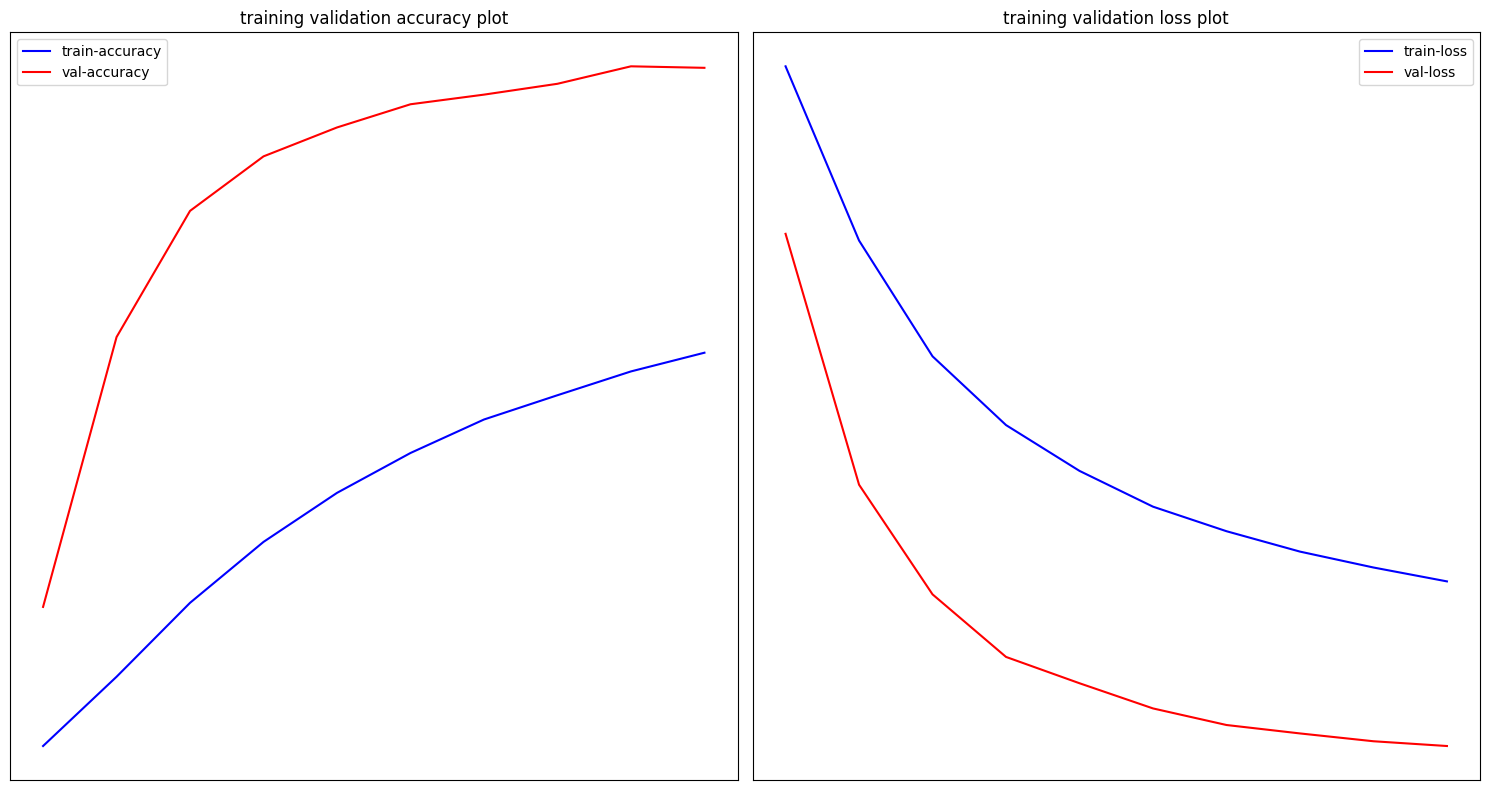

In [ ]:
fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']


X_plot = range(len(accuracy))

axes[0].plot(X_plot,accuracy,'b',label='train-accuracy')
axes[0].plot(X_plot,val_accuracy,'r',label='val-accuracy')
axes[0].set_title('training validation accuracy plot')
axes[0].legend()

axes[1].plot(X_plot,loss,'b',label='train-loss')
axes[1].plot(X_plot,val_loss,'r',label='val-loss')
axes[1].set_title('training validation loss plot')
axes[1].legend()
plt.tight_layout()
plt.show()


#Import model

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/EfficientNetB0_For_birdClassification.h5')

In [17]:
results = model1.evaluate(test_generator,verbose = 0)

In [18]:
results

[0.2808634638786316, 0.9436190724372864]

##prediction of data from path

In [19]:
import cv2

def read_resize_image_opencv(image_path, target_size=(224, 224)):
    # Read the image from the specified path
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Resize the image to the target size (224x224)
    resized_image = cv2.resize(image, target_size)

    #BGR TO RGB
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    return resized_image

In [21]:
y = read_resize_image_opencv('/content/download2.jpeg')
y = np.expand_dims(y,axis=0)
y.shape

(1, 224, 224, 3)

In [22]:
y = model1.predict(y)
y = np.argmax(y,axis=1)


1/1 [==============================] - 2s 2s/step


In [23]:
y

array([383])

In [39]:
classes[y[0]]

'PEACOCK'

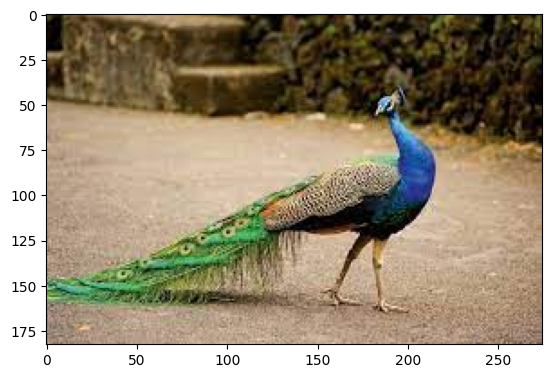

In [40]:
image = cv2.imread('/content/download2.jpeg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

#getting clases

In [25]:
import os
directory = "/content/test"  # Replace with the path to your directory

classes = os.listdir(directory)
classes = [folder for folder in classes ] #if os.path.isdir(os.path.join(directory, folder))
classes.sort()
print(len(classes))
print(classes)

525
['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER

In [26]:
test_pred = model1.predict(test_generator)
test_pred = np.argmax(test_pred,axis=1)

83/83 [==============================] - 201s 2s/step


In [27]:
test_pred

array([314, 391, 278, ..., 480, 133, 291])

#Batch Prediction

In [28]:
images, labels = test_generator.next()

In [29]:
images.shape

(32, 224, 224, 3)

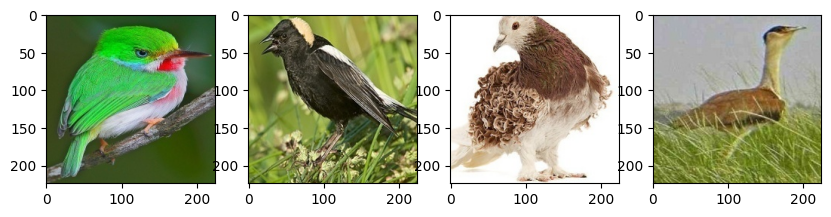

In [30]:
fig, ax = plt.subplots(ncols=4,figsize=(10,10))
for idx, img in enumerate(images[:4]):
  ax[idx].imshow(img.astype(np.uint8))

In [31]:
pred_32 = model1.predict(images)
pred_32 = np.argmax(pred_32,axis=1)

1/1 [==============================] - 4s 4s/step


In [32]:
pred_32 #2

array([181, 104, 232, 298, 450,  20, 482, 126, 278, 149, 223, 202, 283,
       282,  40, 521, 263, 188,  32, 155, 224, 407, 455, 363, 245, 412,
       307,  89, 473, 140, 147, 298])

In [33]:
np.where(labels[1]==1)[0][0]

104

In [34]:
original_bird1 = [ np.where(labels[i]==1)[0][0] for i in range(len(labels))]
original_bird = [classes[i] for i in original_bird1]
original_bird1

[181,
 104,
 232,
 298,
 450,
 20,
 482,
 126,
 278,
 460,
 223,
 202,
 283,
 282,
 40,
 521,
 263,
 188,
 32,
 155,
 224,
 407,
 455,
 363,
 245,
 412,
 307,
 89,
 473,
 140,
 32,
 298]

In [35]:
pred_32_bird = [classes[i] for i in pred_32]
pred_32_bird

['CUBAN TODY',
 'BOBOLINK',
 'FRILL BACK PIGEON',
 'INDIAN BUSTARD',
 'SNOW PARTRIDGE',
 'AMERICAN KESTREL',
 'TREE SWALLOW',
 'CANVASBACK',
 'HARPY EAGLE',
 'CINNAMON TEAL',
 'FAN TAILED WIDOW',
 'EASTERN ROSELLA',
 'HIMALAYAN BLUETAIL',
 'HEPATIC TANAGER',
 'ASIAN DOLLARD BIRD',
 'YELLOW BREASTED CHAT',
 'GREEN JAY',
 'DAURIAN REDSTART',
 'ANTBIRD',
 'COLLARED CRESCENTCHEST',
 'FASCIATED WREN',
 'RED FACED WARBLER',
 'SORA',
 'NORTHERN RED BISHOP',
 'GOLDEN PHEASANT',
 'RED LEGGED HONEYCREEPER',
 'IWI',
 'BLACK-CAPPED CHICKADEE',
 'TAILORBIRD',
 'CHESTNET BELLIED EUPHONIA',
 'CINNAMON ATTILA',
 'INDIAN BUSTARD']

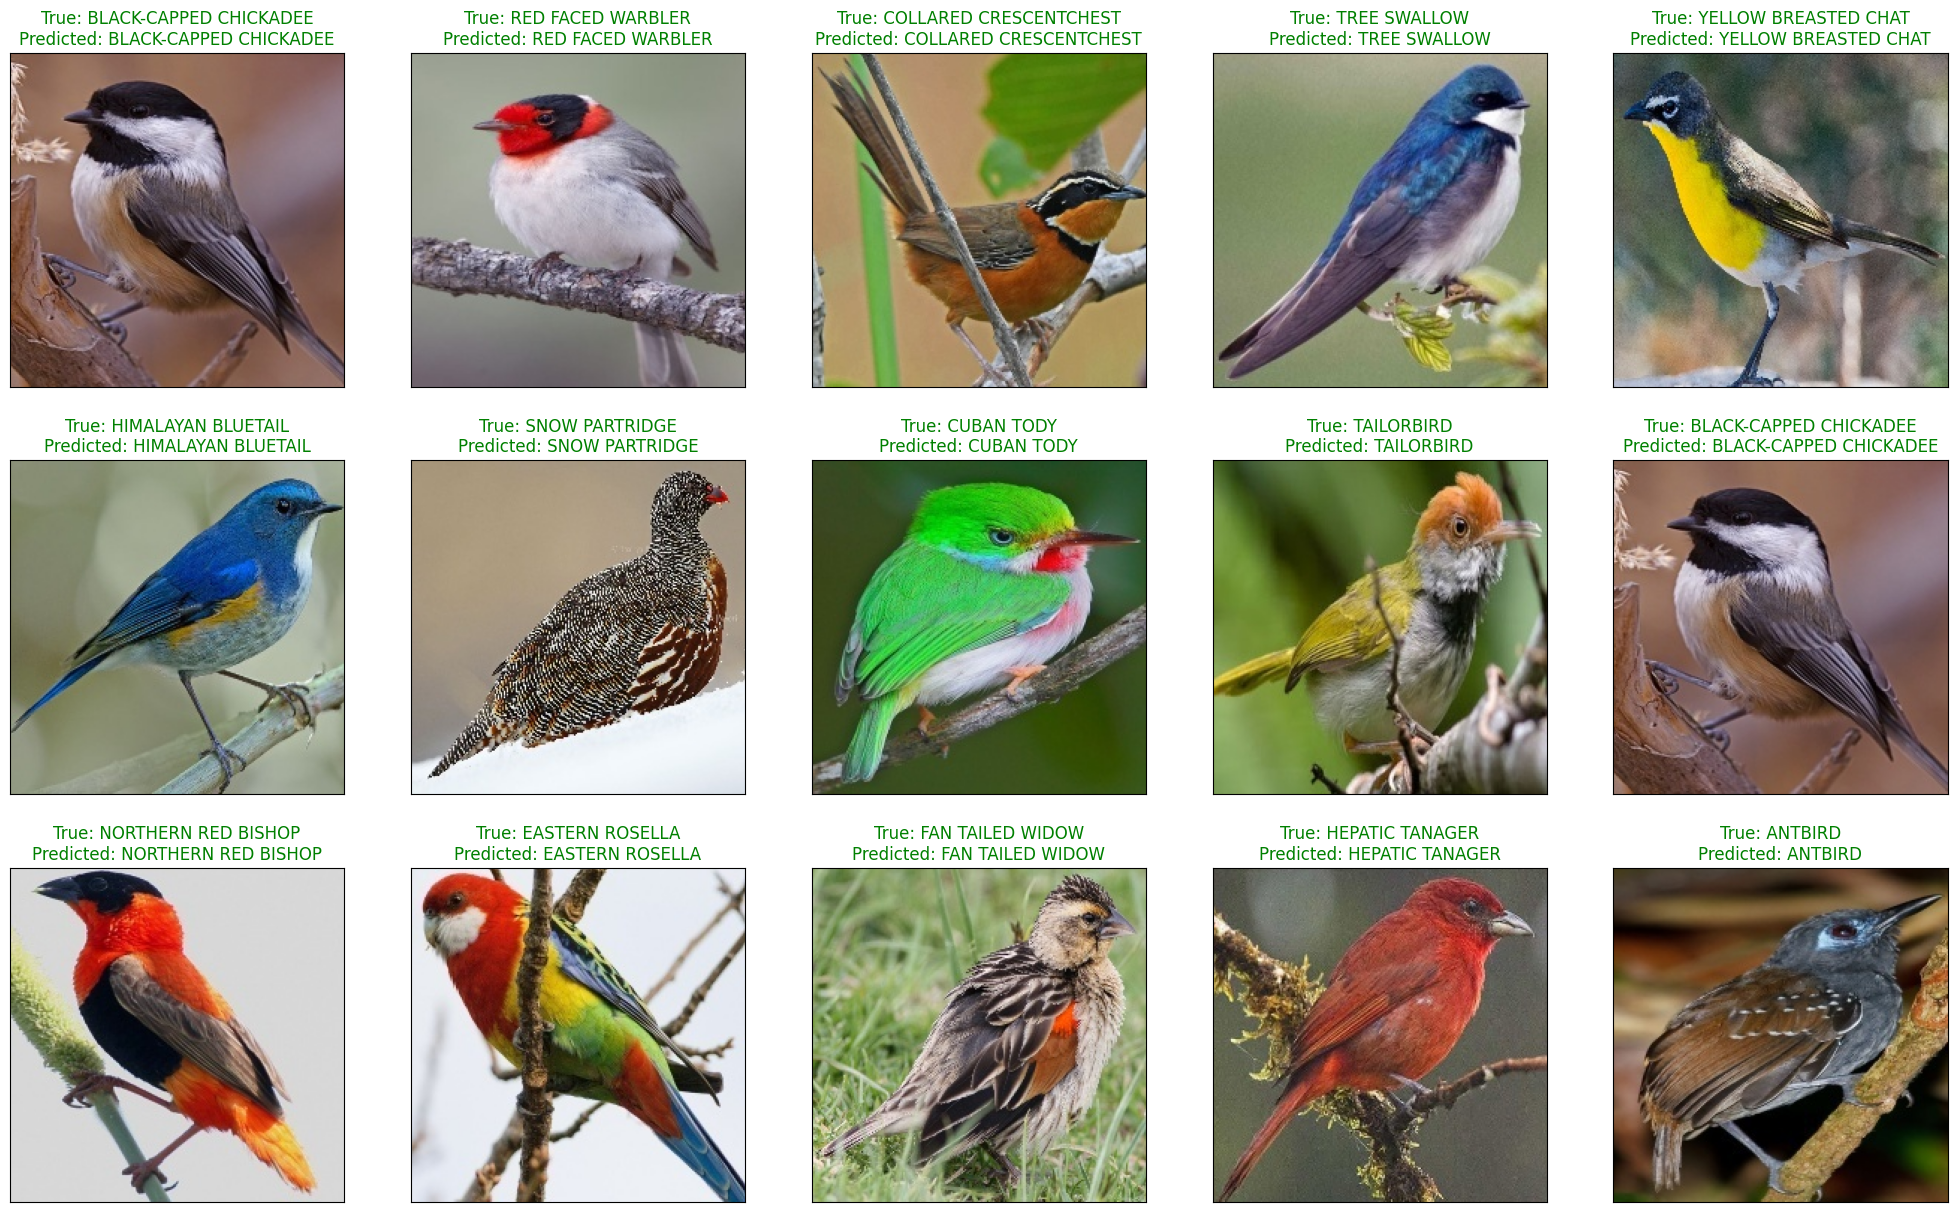

<Figure size 640x480 with 0 Axes>

In [36]:
random_index = np.random.randint(0, 32, 15 )
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    #print(i)

    ax.imshow(images[random_index[i]].astype(np.uint8))
    bird = np.where(labels[random_index[i]]==1)[0]
    if pred_32_bird[random_index[i]] == original_bird[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {original_bird[random_index[i]]}\nPredicted: {pred_32_bird[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

TESTING SOMETHING....


In [37]:
from PIL import Image,ImageOps
import cv2

In [ ]:
image = cv2.imread('/content/download2.jpeg', cv2.IMREAD_COLOR)
image = ImageOps.fit(image,(224,224),Image.Resampling.LANCZOS )

    #image to Numpy array
img_array = np.asarray(image)

    #normalize image
norm_img_array = img_array.astype(np.uint8) / 255

    #set model input
data = np.ndarray(shape=(1,224,224,3),dtype=np.uint8)
data[0] = norm_img_array

data.shape

In [ ]:
#prediction
pre = model1.predict(data)
ind = np.argmax(pre,axis=1)
label = classes[ind[0]]
label